<a href="https://colab.research.google.com/github/Xiqi-Li/CTD/blob/master/Colab_CTD_PLOSCB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enable editing by making a copy <a name="make-copy"></a>

To enable **editing** of the notebook please make a copy of it and place it into your google drive. Please click on: `"File" -> "Save a copy in Drive"`. Allow access to your google drive if requested. 

For more details on how to use Google Colab please refer to the [Colab docs](https://colab.research.google.com/notebooks/welcome.ipynb).

# 0. Setup R environment <a name="setup-r"></a>
Please run this command **before any analysis** and **each time you start a new session**!

In [0]:
download.file(destfile="r-env-setup-script.R", 
    url="https://raw.githubusercontent.com/BRL-BCM/CTD/master/vignette/r-env-setup-script.R")
source("r-env-setup-script.R")
print("Setup done")
options(warn=-1)

Download R package cache

Unzipping R package cache



[1] "Setup done"


# 1. Connect the Dots (CTD) usage example for Inborn Errors of Metabolism (IEMs) <a name="ctd-example"></a>

See documentation for [`CTD`](https://github.com/BRL-BCM/CTD/blob/master/CTD.pdf) to familiarize yourself with the range of functionalities offered. 

>## 1.0 Prepare dataset

In [0]:
# Load package to verify libraries have been successfully setup.
require(CTD)
# Load sample dataset from Thistlethwaite et al. (2019).
data(Miller2015)
data_mx.og = as.matrix(Miller2015[,grep("IEM_", colnames(Miller2015))])# one sample per column, one metabolite per row.
# create dignosis-patient map.
cohorts = list()
cohorts$mcc = diagnoses$id[which(diagnoses$diagnosis=="3-methylcrotonyl CoA carboxylase")]
cohorts$arg = diagnoses$id[which(diagnoses$diagnosis=="Argininemia")]
cohorts$cit = diagnoses$id[which(diagnoses$diagnosis=="Citrullinemia")]
cohorts$cob = diagnoses$id[which(diagnoses$diagnosis=="Cobalamin biosynthesis")]
cohorts$ga = diagnoses$id[which(diagnoses$diagnosis=="Glutaric Aciduria")]
cohorts$gamt = diagnoses$id[which(diagnoses$diagnosis=="Guanidinoacetate methyltransferase")]
cohorts$msud = diagnoses$id[which(diagnoses$diagnosis=="Maple syrup urine disease")]
cohorts$mma = diagnoses$id[which(diagnoses$diagnosis=="Methylmalonic aciduria")]
cohorts$otc = diagnoses$id[which(diagnoses$diagnosis=="Ornithine transcarbamoylase")]
cohorts$pa = diagnoses$id[which(diagnoses$diagnosis=="Propionic aciduria")]
cohorts$pku = diagnoses$id[which(diagnoses$diagnosis=="Phenylketonuria")]
cohorts$tmhle = diagnoses$id[which(diagnoses$diagnosis=="Trimethyllysine hydroxylase epsilon")]
cohorts$ref = diagnoses$id[which(diagnoses$diagnosis=="No biochemical genetic diagnosis")]

Now we can run the analyses to reproduce results from Thistlethwaite et al. (2019).

1.  **Visualize** individual or average cohort metabolomics profiles on comprehensive or individual **pathway maps from MetaboLync**, curated by Metabolon.

2.  Estimate the **probability** and **significance** of a metabolite set against different disease-specific network contexts using CTD.

3.  Use CTD as **feature selection** method and **a covariate** in Partial Least Square (PLS) regression.


>## 1.1 Plot individual metabolomics profiles onto biochemical pathway maps.

In [0]:
# Create an output directory
dir.create("./pathwayVis", showWarnings = FALSE)

# Return a list of pathway maps curated by Metabolon's Metabolync.
pathway.ListMaps_metabolon() 

[1] "All Pathways"                       "Arginine Metabolism"               
 [3] "Ascorbate Metabolism"               "Asp Glu Metabolism"                
 [5] "BCAA Metabolism"                    "Benzoate Metabolism"               
 [7] "Beta Oxidation"                     "Bile Acid Metabolism"              
 [9] "Carbamoylphosphate Pathway"         "Carnitine Biosynthesis"            
[11] "Cholesterol Synthesis"              "Creatine Metabolism"               
[13] "DicarboxylicAcid Metabolism"        "Eicosanoids"                       
[15] "Endocannabinoid Synthesis"          "FattyAcid Metabolism"              
[17] "Fibrinogen Cleavage Peptides"       "GABA Shunt"                        
[19] "Galactose Metabolism"               "Glutathione Metabolism"            
[21] "Gly Ser Thr Metabolism"             "Glycogen Metabolism"               
[23] "Glycolysis"                         "Glycosylation"                     
[25] "Hemoglobin Porphyrin Metabolism"    "Histidine Metabolism"              
[27] "Inositol Metabolism"                "Ketone Bodies"                     
[29] "Lysine Catabolism"                  "Met Cys Metabolism"                
[31] "Mevalonate Metabolism"              "Nicotinate Nicotinamide Metabolism"
[33] "Pantothenate Metabolism"            "Pentose Phosphate Metabolism"      
[35] "Phe Tyr Metabolism"                 "Phospholipid Metabolism"           
[37] "Polyamine Metabolism"               "Proline Metabolism"                
[39] "Protein Degradation"                "Purine Metabolism"                 
[41] "Pyridoxal Metabolism"               "Pyrimidine Metabolism"             
[43] "Riboflavin Metabolism"              "Secondary Bile Acids"              
[45] "Sorbitol Glycerol Metabolism"       "Sphingolipid Metabolism"           
[47] "Steroid Hormone Biosynthesis"       "TCA Cycle"                         
[49] "Thyroid Hormone Synthesis"          "Tryptophan Metabolism"

[1] "proteinogeneic amino acid: 0.250000"
[1] "long chain acyl-coa / long chain fatty acids: 0.133333"
[1] "long chain fatty acid: 0.133333"
[1] "medium chain fatty acid: 0.111111"
[1] "amino acid: 0.250000"
[1] "lysolipids: 0.051724"
[1] "xenobiotic: drug: 0.076923"
[1] "dietary: plant compoent: 0.096774"
[1] "n-acetyl-amino acids: 0.055556"


png 
  2

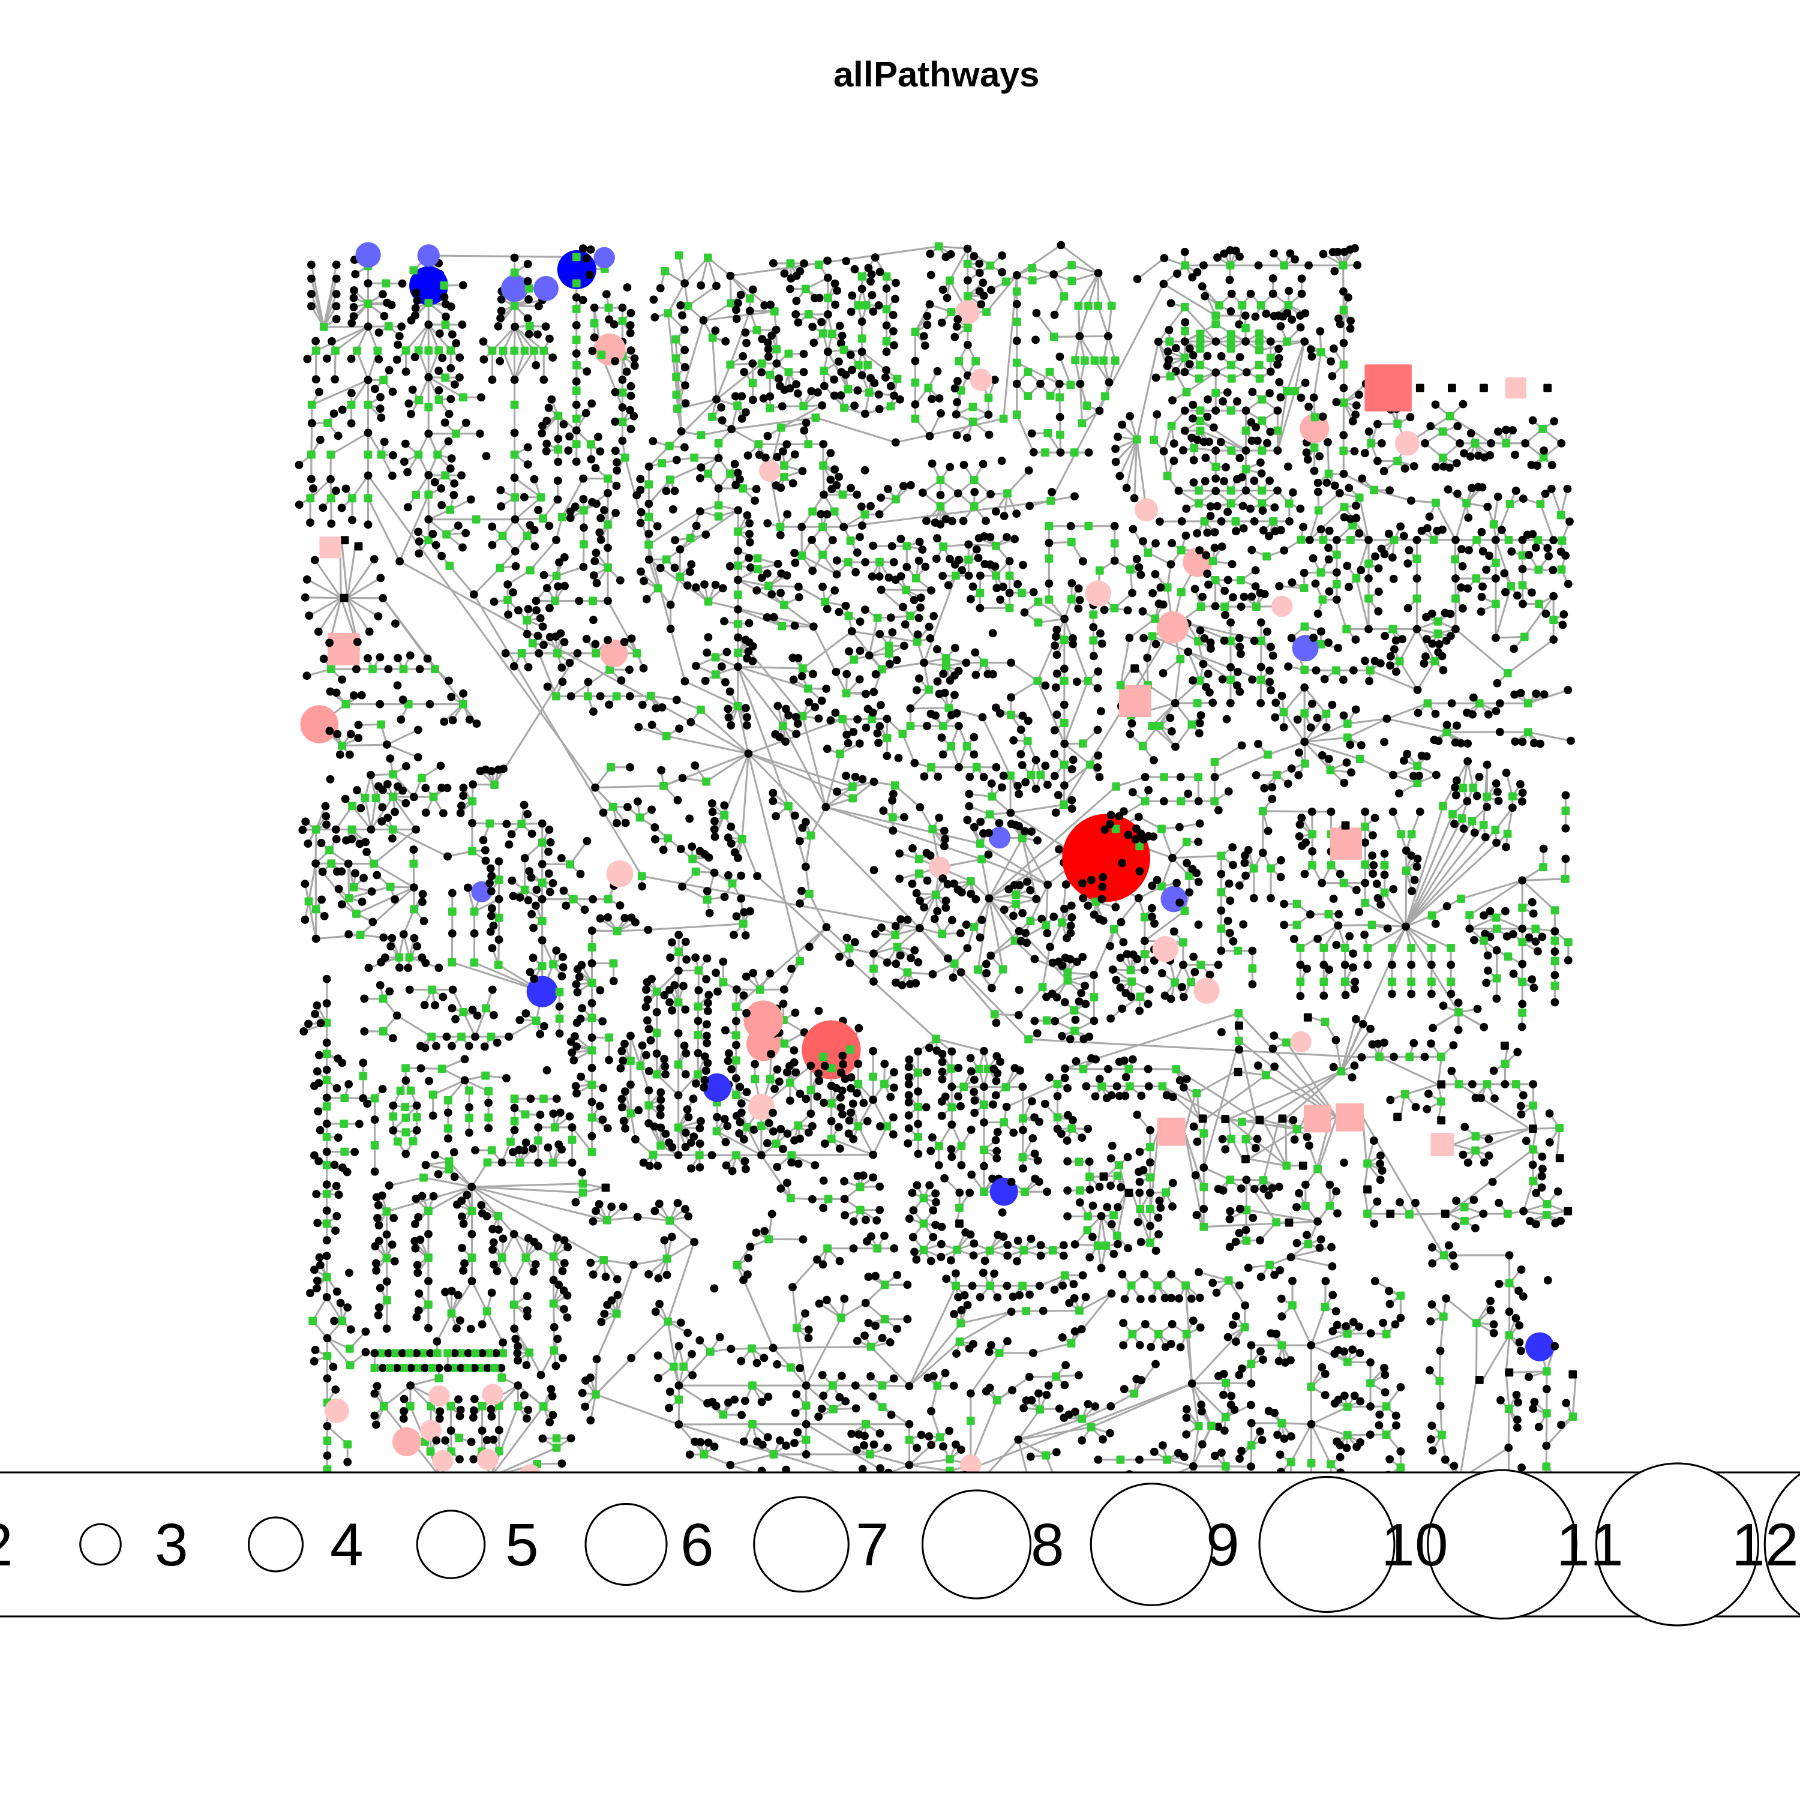

In [0]:
# Generate pathway map with patient perturbation data superimposed on "all Pathway" map;
data_mx=data_mx.og
plot.pathwayMap("allPathways", "IEM_1023", data_mx[,"IEM_1023"], 2, 1, out.path="./pathwayVis", SVG = FALSE)

# Display pathway map
if (!require(png)) {
  install.packages('png')
  library(png)
}
require(grid)
img <- readPNG('./pathwayVis/allPathways-IEM_1023.png')
options(repr.plot.width=15, repr.plot.height=15)
grid::grid.raster(img)

>## 1.2 Interpretation of multi-metabolite perturbations using CTD.

Before we start the analysis, we need to prepare some global variables and tuning parameters.

**Global Variables**
> * **G** - a list object with metabolite node names as list element names and a numeric probability, set initially to 0 for all elements.
> * **adjacency_matrix** - a list object containing any number of adjacency matrices for one or more networks

**Tuning parameters (defaults)**
> * **p0** = 0.1
> * **p1** = 0.9
> * **thresholdDiff** = 0.01



>>### 1.2.1 Interpret disease signatures of **individual** patients




Now, we are ready to estimate probabilities of individual patient's metabolite perturbations in disease contexts. 

In [0]:
# Create an output directory
dir.create("./loocv/blowouts", recursive = TRUE, showWarnings = FALSE)
require(R.utils)
# set global variables
p0 = 0.1 
p1 = 0.9
thresholdDiff = 0.01
kmx=15 # Setting kmx=15 will select top 15 perturbed metabolites

ptIDs = c("IEM_1017","IEM_1058","IEM_1051","IEM_1093")
p.igraph=list()
for (ptID in ptIDs){
  getDiag=sapply(cohorts,function(x) which(x==ptID))
  model=names(getDiag[sapply(getDiag,length)>0])
  fold=getDiag[sapply(getDiag,length)>0] 
  # load latent-embedding, pruned network that is learnt from the rest of the patients diagnosed with the same disease.
  ig = loadToEnv(system.file(sprintf('networks/ind_foldNets/bg_%s_ind_fold%s.RData',model,fold), package='CTD'))[['ig_pruned']]
  # get "ig" derived adjacency matrix
  G = vector(mode="list", length=length(V(ig)$name))
  names(G) = V(ig)$name
  adjacency_matrix = list(as.matrix(get.adjacency(ig, attr="weight")))
  data_mx = data_mx.og[which(rownames(data_mx.og) %in% V(ig)$name), ]
  # p.value derived from z-score
  data.pvals = sapply(data_mx[,ptID], function(i) 2*pnorm(abs(i), lower.tail = FALSE))
  data.pvals = t(data.pvals)
  rownames(data.pvals)=ptID

  # using single-node diffusion
  S = data_mx[order(abs(data_mx[,ptID]), decreasing = TRUE),ptID][1:kmx] # top kmx perturbed metabolites in ptID's profile
  print(sprintf("%s: Single-node ranking...",ptID))
  ranks = list()
  for (i in 1:length(S)) {
    ind = which(names(G)==names(S)[i])
    ranks[[i]] = singleNode.getNodeRanksN(ind, G, names(S), num.misses = log2(length(G))) # get node ranks
  }
  names(ranks) = names(S)
  ptBSbyK = singleNode.getPtBSbyK(names(S), ranks) # encode nodes
  res = mle.getEncodingLength(ptBSbyK, data.pvals, ptID, G) # get encoding length
  mets = unique(c(names(S), names(ptBSbyK[[which.max(res[,"d.score"])]]))) # best co-perturbed metabolite set is the most compressed subset of nodes
  p.mets=2^-(res[which.max(res[,"d.score"]),"d.score"]-log2(nrow(res))) # p value of this "modular perturbation"
  print(mets)
  print(p.mets)

  # generate igraph for disease-relevant metabolites of the selected patient
  e = delete.vertices(ig, v=V(ig)$name[-which(V(ig)$name %in% mets)])
  reds = intersect(V(e)$name[which(V(e)$name %in% names(S))], names(S[which(S>0)]))
  blues = intersect(V(e)$name[which(V(e)$name %in% names(S))], names(S[which(S<0)]))
  V(e)$color[which(V(e)$name %in% reds)] = "red" # red indicates positive z-score
  V(e)$color[which(V(e)$name %in% blues)] = "light blue" # blue indicates negative z-score
  V(e)$color[-which(V(e)$name %in% names(S))] = "grey" # grey verteces are highly connect to "mets"
  cc = cluster_walktrap(e) #find densely connected subgraphs, also called communities in a graph via random walks. 
  # print(communities(cc))
  print("")
  weights = ifelse(crossing(cc, e), 1, 5)
  layout = layout_with_fr(e, weights=weights)
  p.igraph[[ptID]]=list(model=model,e=e,layout=layout)
}

[1] "IEM_1017: Single-node ranking..."
 [1] "citrulline"                       "3-ureidopropionate"              
 [3] "stearate, methyl ester"           "docosahexaenoate (dha; 22:6n3)"  
 [5] "phenylacetylglutamine"            "homocitrulline"                  
 [7] "1-palmitoylplasmenylethanolamine" "uridine"                         
 [9] "1,5-anhydroglucitol (1,5-ag)"     "glucose"                         
[11] "4-methyl-2-oxopentanoate"         "1-docosahexaenoyl-gpc (22:6)"    
[13] "2-arachidonoyl glycerol"          "2-myristoyl-gpc (14:0)"          
[15] "tryptophan"                      
[1] 5.729413e-07
[1] ""
[1] "IEM_1058: Single-node ranking..."
 [1] "allo-isoleucine"                  "4-methyl-2-oxopentanoate"        
 [3] "alpha-hydroxyisovalerate"         "3-methyl-2-oxovalerate"          
 [5] "leucine"                          "3-hydroxyisobutyrate"            
 [7] "isoleucine"                       "isovalerylcarnitine (c5)"        
 [9] "2-methylbutyroylcarnitine (

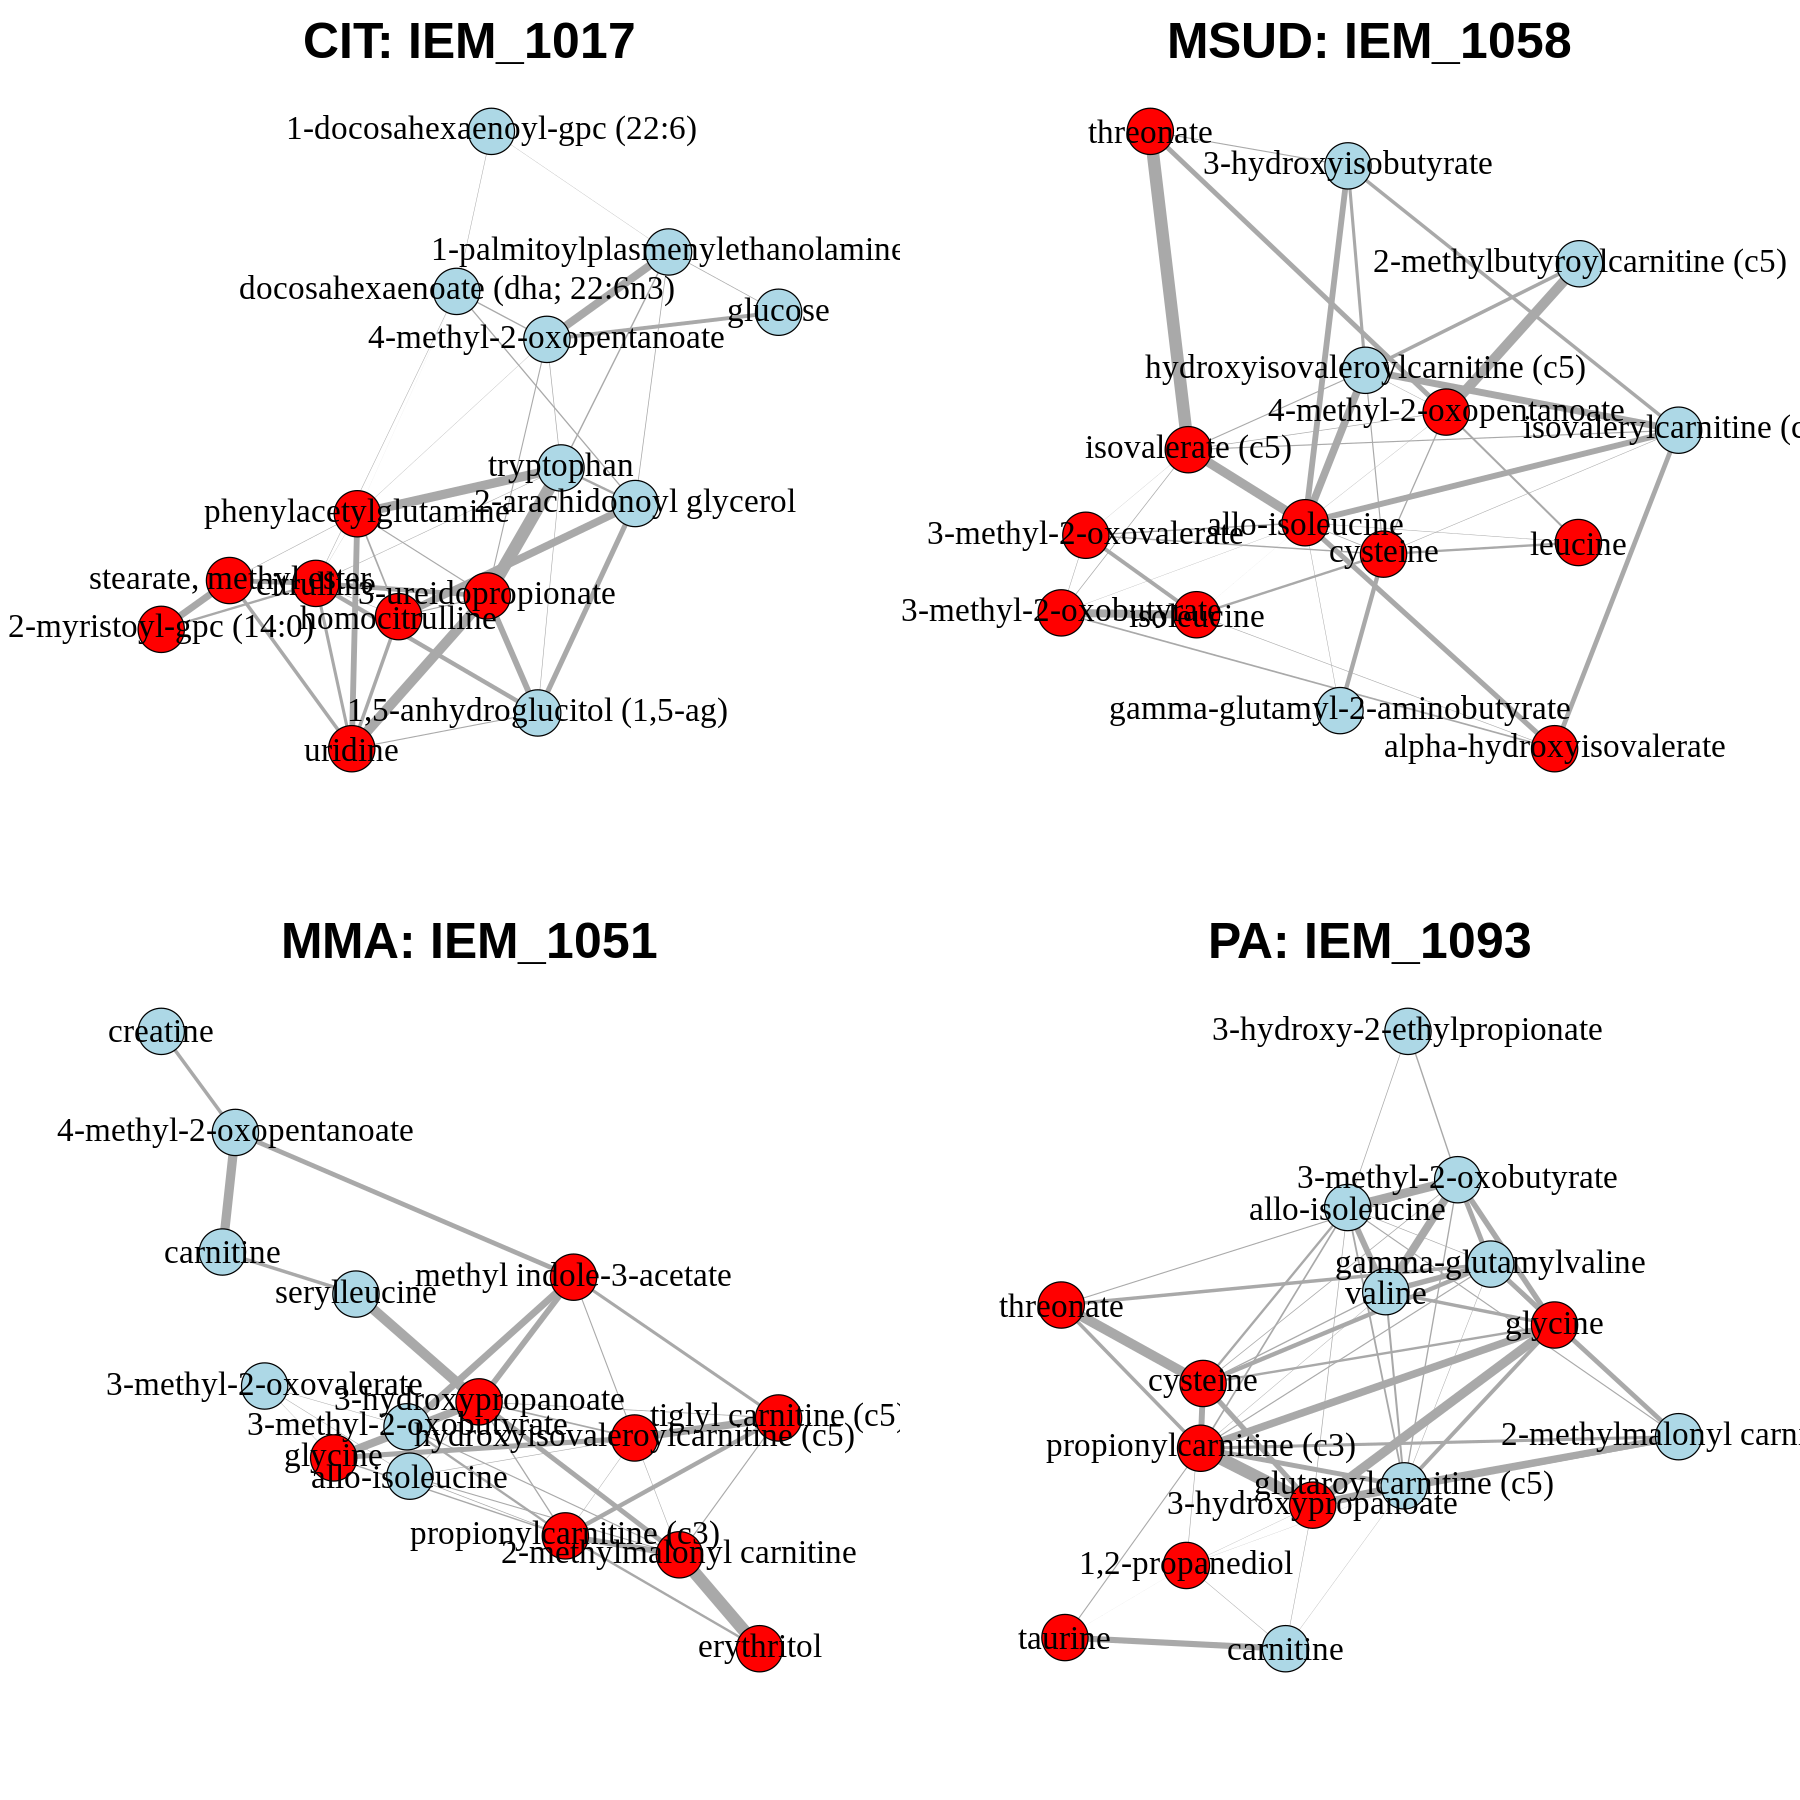

In [0]:
# plot igraph for disease-relevant metabolites of the selected patient
options(repr.plot.width=15, repr.plot.height=15)
par(mfrow = c(2,2))
for (ptID in ptIDs){
  p=p.igraph[[ptID]]
  png(sprintf("./loocv/blowouts/%s_%s_module.png", p$model, ptID))
  plot.igraph(p$e, layout=p$layout, edge.width=50*abs(E(e)$weight),vertex.label.cex=2,vertex.label.color="black",main=sprintf("%s: %s",toupper(p$model),ptID))
  dev.off()
  plot.igraph(p$e, layout=p$layout, edge.width=50*abs(E(e)$weight),vertex.label.cex=2,vertex.label.color="black")
  title(main=sprintf("%s: %s",toupper(p$model),ptID),cex.main=3)
}

>>### 1.2.2 Estimate the probability and significance of a metabolite set against different disease-specific network contexts using CTD.

Now we can visualize signal CTD estimates for the **five modeled disease**, and compare **three different network learning paradigms**: **i)** latent embedding + network pruning, **ii)** latent embedding + no network pruning **iii)** no latent embedding or network pruning.

> CTD package provided the precomputed node rankings derived from these 5 disease networks in order to save computational resources. You can find **how to precompute node rankings** under {r pre-compute-node-rankings} here: https://github.com/BRL-BCM/CTD/blob/master/vignette/Methods_paper_PLOSCB.Rmd

> You can find **how to learn partial-correlation disease-specific interaction networks** under {r learn-networks} here: https://github.com/BRL-BCM/CTD/blob/master/vignette/Methods_paper_PLOSCB.Rmd

The following cell expanded the diffusion-based encoding followed by decoding process to all samples in data_mx.og for 5 disease models and 3 types of networks. The output dataframes will be saved as RData files. This process **may take a few minutes** depending on Colab's assignment of VM.

In [0]:
require(R.utils)
p0=0.1
p1=0.9
thresholdDiff=0.01
kmx=15
p=list()

for (type in c("ind", "noPruning", "noLatent")) {
  dir.create(sprintf("./loocv/loocv_%s_runCTD/",type), recursive = TRUE, showWarnings = FALSE)
  for (model in c("cit", "msud", "mma", "pa", "pku")) {
    for (fold in 1:length(which(cohorts[[model]] %in% colnames(Miller2015)))) {
      # load corresponding networks.
      if (type=="noPruning") {
        ig = loadToEnv(system.file(sprintf('networks/ind_foldNets/bg_%s_ind_fold%s.RData',model,fold), package='CTD'))[['ig']]
        # latent embedding + no network pruning
      } else if (type=="noLatent") {
        ig = loadToEnv(system.file(sprintf('networks/%s_foldNets/bg_%s_%s_fold%s.RData',type,model,type,fold), package='CTD'))[['ig']]
        # latent embedding + network pruning
      } else {
        # no latent embedding or network pruning
        ig = loadToEnv(system.file(sprintf('networks/%s_foldNets/bg_%s_%s_fold%s.RData',type,model,type,fold), package='CTD'))[['ig_pruned']]
      }
      adjacency_matrix = list(as.matrix(get.adjacency(ig, attr="weight")))
      G = vector(mode="list", length=length(V(ig)$name))
      names(G) = V(ig)$name

      # load precomputed node ranks that were derived from the loaded graph
      ranks = loadToEnv(system.file(sprintf("ranks/%s_ranks/%s%s-ranks.RData", type, toupper(model), fold), package='CTD'))[["permutationByStartNode"]]
      ranks = lapply(ranks, function(i) tolower(i))

      # p.value matrix derived from z-score
      data_mx = data_mx.og[which(rownames(data_mx.og) %in% V(ig)$name), ]
      data_mx = data_mx[,which(colnames(data_mx) %in% unlist(cohorts))] # choose which samples to include
      data.pvals = apply(data_mx, c(1,2), function(i) 2*pnorm(abs(i), lower.tail = FALSE))
      data.pvals = t(data.pvals)
      
      df = data.frame(ptID=character(), S=character(), lenS=numeric(), optT=numeric(),
                      fishers=numeric(), I0=numeric(), IA=numeric(), d=numeric(), stringsAsFactors = FALSE)
      r=1
      ptBSbyK = list()
      for (p in 1:ncol(data_mx)) {
        ptID = colnames(data_mx)[p]
        print(sprintf("Model: %s - Type: %s. Patient %d/%d...", model, type, p, ncol(data_mx)))
        if (ptID %in% unlist(cohorts)) {
          diag = names(cohorts)[which(unlist(lapply(cohorts, function(i) ptID %in% i)))]
          # using single-node diffusion
          S = data_mx[order(abs(data_mx[,p]), decreasing = TRUE),p][1:kmx]
          ptBSbyK = singleNode.getPtBSbyK(names(S), ranks, num.misses = log2(length(G)))
          res = mle.getEncodingLength(ptBSbyK, data.pvals, ptID, G)
          for (k in 1:kmx) {
            df[r, "ptID"] = colnames(data_mx)[p]
            df[r, "diag"] = diag # diagnosis
            df[r, "S"] = paste(names(S)[1:k], collapse="/") # node names (metabolites)
            df[r, "lenS"] = k # length of diffussion path
            df[r, "optT"] = res[k, "opt.T"]
            df[r, "fishers"] = res[k, "fishers.Info"]
            df[r, "I0"] = res[k, "IS.null"]
            df[r, "IA"] = res[k, "IS.alt"]
            df[r, "d"] = res[k, "d.score"]
            r = r + 1
          }
        }
      }
      save(ptBSbyK, df, file=sprintf("./loocv/loocv_%s_runCTD/model_%s_%s_fold%d_kmx%d.RData", type, model, type, fold, kmx))
    }
  }
}

Calculate ROC's AUC value.

In [0]:
require(pROC)
kmx=15
p2=list()
for (model in c("pku", "pa", "mma", "msud", "cit")) {
  for (type in c("ind", "noLatent", "noPruning")) {
    df_all = data.frame(fold=numeric(), pt=numeric(), bits=numeric(), diag=character(), stringsAsFactors = FALSE)
    for (fold in 1:length(which(cohorts[[model]] %in% colnames(Miller2015)))) {
      load(sprintf("./loocv/loocv_%s_runCTD/model_%s_%s_fold%d_kmx%d.RData", type, model, type, fold, kmx))
      pts = unique(df$ptID)
      df = df[which(df$ptID %in% pts),]
      df_best = data.frame(pt=numeric(), ptID=character(), bits=numeric(), diag=character(), stringsAsFactors = FALSE)
      for (pt in 1:length(pts)) {
        pt_data = df[which(df$ptID==pts[pt]),]
        ptID = unique(df[which(df$ptID==pts[pt]), "ptID"])
        if (pt_data[1,"diag"]==model) {
          df_best[pt, "pt"] = which(cohorts[[model]]==ptID)
        }
        df_best[pt, "ptID"] = ptID
        df_best[pt, "bits"] = max(df[which(df$ptID==pts[pt]), "d"])-log2(nrow(pt_data)) # p adjust for kmx
        df_best[pt, "diag"] = unique(pt_data[,"diag"])
      }
      df_best$bits[which(df_best$bits<0)] = 0
      df_best$fold = rep(fold, nrow(df_best))
      df_all = rbind(df_all, df_best)
    }
    df_all = df_all[which(df_all$ptID %in% colnames(Miller2015)),]
    df_all$bits = -log2(p.adjust(2^-(df_all$bits), method="fdr"))# p adjust for samples number
    
    # Visualize LOOCV signal and compare to off-target diseased test patients
    dff = df_all
    dff$loocv = rep(0, nrow(dff))
    dff$loocv[which(dff$pt==dff$fold)] = 1
    dff = dff[-intersect(which(dff$loocv==0), which(dff$diag==model)), ]
    b_bits = cbind(unique(dff$ptID), sapply(unique(dff$ptID), function(i) mean(dff[which(dff$ptID==i),"bits"])))
    dff = dff[-which(duplicated(dff$ptID)),]
    dff$diag[which(dff$diag=="ref")] = "z.ref"
    dff = dff[order(dff$ptID),]
    b_bits = b_bits[order(b_bits[,1]),]
    dff$bits = as.numeric(b_bits[,2])
    save(dff,file = sprintf("./loocv/loocv_%s_runCTD/best_bits_%s_%s_loocv.RData", type, model, type))
    # Get diagnostic labels
    d = dff$diag
    d[which(d!=model)] = 0
    d[which(d==model)] = 1
    d = as.numeric(d)
    auc = roc(d, dff$bits,quiet = TRUE)

    p2[[type]][[model]] = ggplot(dff, aes(x=diag, y=bits, fill=diag)) + 
      geom_boxplot(size=0.5) + 
      geom_hline(yintercept=-log2(0.05)) +
      theme(text = element_text(size=15),
            axis.title.x = element_blank(),
            axis.text.x = element_text(angle = 30, hjust = 1,size = 15),
            legend.position = "none") +
      labs(title=sprintf("%s (%s)", model, type),subtitle = sprintf("AUC=%.3f",auc$auc))
    #orca(p2[[type]][[model]], sprintf("./loocv/loocv_%s_runCTD/%s_bg_clinical_%s_loocv.png", type, model, type), width = 1000, height = 500)

    print(sprintf("AUC (Model: %s Type: %s) = %.3f", toupper(model), type, auc$auc))
  }
}

Loading required package: pROC

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




[1] "AUC (Model: PKU Type: ind) = 0.996"
[1] "AUC (Model: PKU Type: noLatent) = 0.925"
[1] "AUC (Model: PKU Type: noPruning) = 0.923"
[1] "AUC (Model: PA Type: ind) = 0.985"
[1] "AUC (Model: PA Type: noLatent) = 0.908"
[1] "AUC (Model: PA Type: noPruning) = 0.962"
[1] "AUC (Model: MMA Type: ind) = 0.945"
[1] "AUC (Model: MMA Type: noLatent) = 0.742"
[1] "AUC (Model: MMA Type: noPruning) = 0.919"
[1] "AUC (Model: MSUD Type: ind) = 0.973"
[1] "AUC (Model: MSUD Type: noLatent) = 0.875"
[1] "AUC (Model: MSUD Type: noPruning) = 0.922"
[1] "AUC (Model: CIT Type: ind) = 0.973"
[1] "AUC (Model: CIT Type: noLatent) = 0.797"
[1] "AUC (Model: CIT Type: noPruning) = 0.877"


In the following cell, you should see that patients showed strong significance when interpreted agaisnt the correct disase-specific network and little to no significance when interpreted with incorrect disease-specific networks. Latent variable embedding is associated with higher model sensetivity, whereas network pruning is associated with higher model specificity.

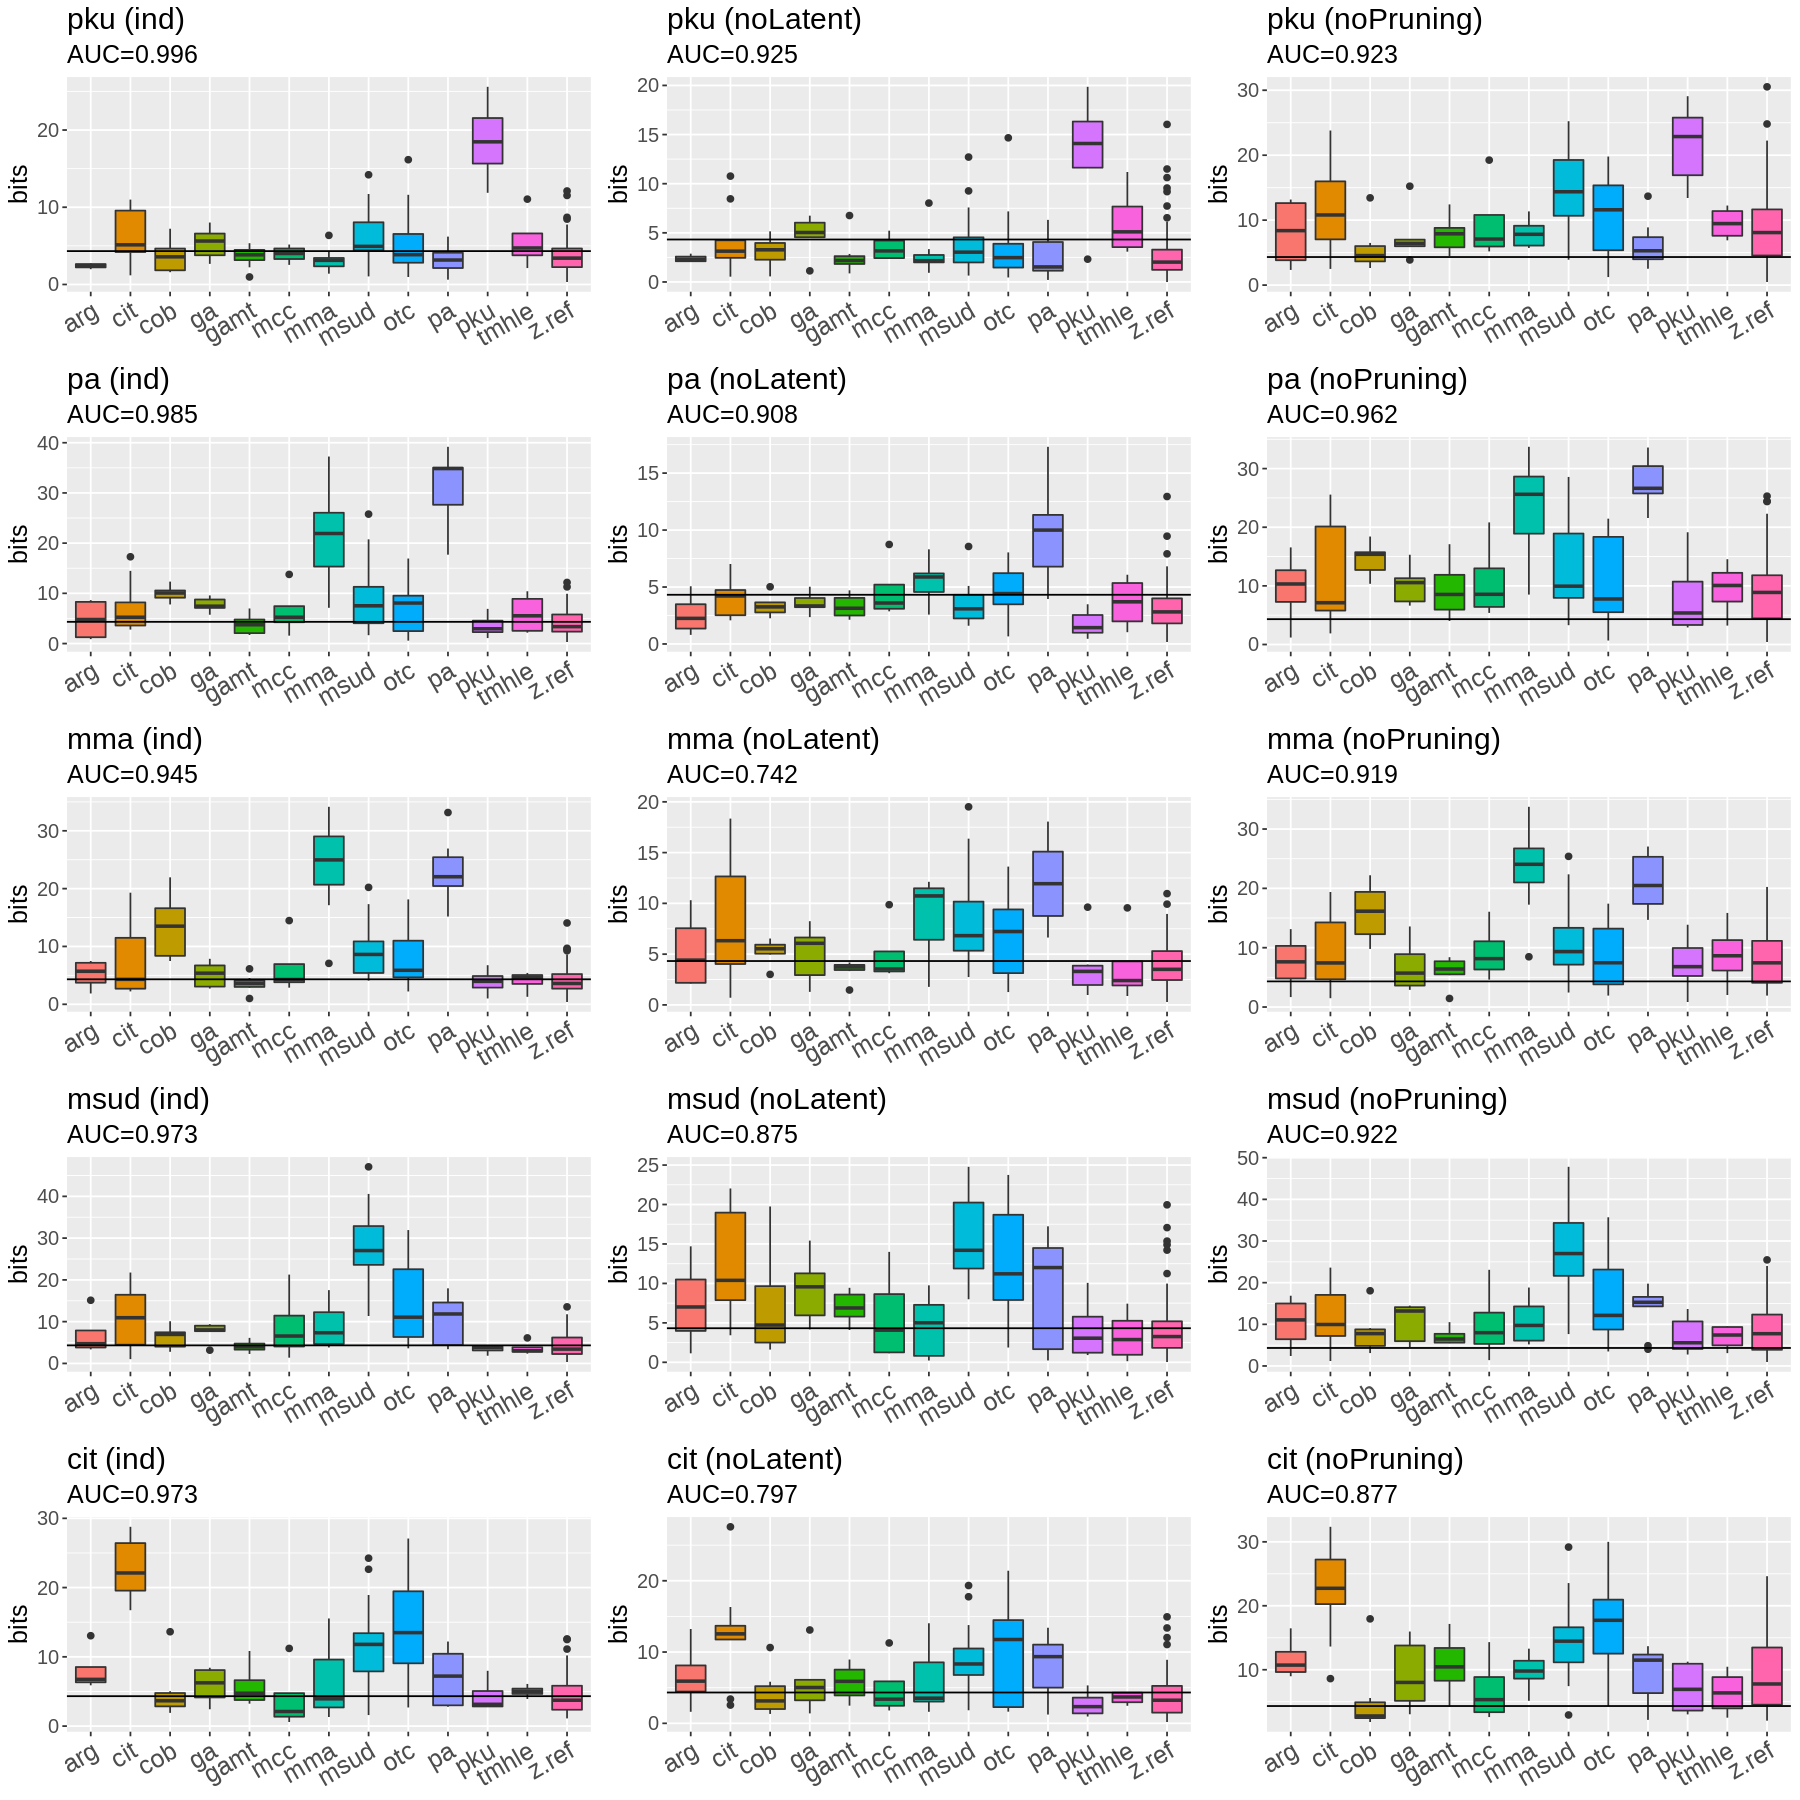

In [0]:
require("gridExtra")
options(repr.plot.width=15, repr.plot.height=15)
g=unlist(p2,recursive = FALSE)
grid.arrange(g[[1]],g[[6]],g[[11]],
            g[[2]],g[[7]],g[[12]],
            g[[3]],g[[8]],g[[13]],
            g[[4]],g[[9]],g[[14]],
            g[[5]],g[[10]],g[[15]],
            ncol = 3)

## 1.3 Use CTD as feature selection method and a covariate in Partial Least Square (PLS) regression.

Here we compare CTD as a feature selection method to a basic top z-score feature selection method. 

>For comparison to FSFCN algorithm, refer to  {r pls_feature_select_compare} here: https://github.com/BRL-BCM/CTD/blob/master/vignette/Methods_paper_PLOSCB.Rmd

Click through section 1.2.2 before you start.

In [0]:
### CTD feature selection
rm(list=setdiff(ls(),c("data_mx.og","cohorts")))
module_select=list()

fill.rate = 1-(Miller2015$`Times identifed in all 200 samples`/200)
data_mx = data_mx.og[which(fill.rate<0.20), ]
data_mx = data_mx[-grep("x - ", rownames(data_mx)),]

for (model in c("cit", "msud", "mma", "pa", "pku")) {
  # mean z-score > 2 will be selected in zscore module
  df_mn = apply(data_mx[,which(colnames(data_mx) %in% cohorts[[model]])], 1, function(i) mean(na.omit(i)))
  module_select[["Zscore"]][[model]] = names(df_mn[which(abs(df_mn)>2)])
  
  # CTD select metabolites that are present in at least 50% of patients' optimally connected subsets
  mdst = c()
  df_ctd = data.frame(ptID=character(), mets=character(), m=numeric(), stringsAsFactors = FALSE)
  for (fold in 1:length(cohorts[[model]])) {
    load(system.file(sprintf('networks/ind_foldNets/bg_%s_ind_fold%s.RData',model,fold), package='CTD'))
    #load(sprintf("loocv/loocv_nets/ind_foldNets/bg_%s_ind_fold%d.RData", model, fold))
    adjacency_matrix = list(as.matrix(get.adjacency(ig_pruned, attr="weight")))
    G = vector(mode="list", length=length(V(ig_pruned)$name))
    names(G) = V(ig_pruned)$name
    #ranks = loadToEnv(sprintf("./loocv/loocv_ind_runCTD/%s%d-ranks.RData", toupper(model), fold))[["permutationByStartNode"]]
    ranks = loadToEnv(system.file(sprintf('ranks/ind_ranks/%s%d-ranks.RData',toupper(model), fold), package='CTD'))[["permutationByStartNode"]]
    ranks = lapply(ranks, tolower)
    ptID = cohorts[[model]][fold]
    diag = names(cohorts)[which(unlist(lapply(cohorts, function(i) ptID %in% i)))]
    S = data_mx[order(abs(data_mx[,ptID]), decreasing = TRUE),ptID]
    S = S[which(abs(S)>2)]
    S = S[which(names(S) %in% names(G))]
    ptBSbyK = singleNode.getPtBSbyK(names(S), ranks, num.misses = log2(length(G)))
    res = mle.getEncodingLength(ptBSbyK, NULL, ptID, G)
    df_ctd[fold, "ptID"] = cohorts[[model]][fold]
    df_ctd[fold, "mets"] = paste(names(which(ptBSbyK[[which.max(res[,"d.score"])]]==1)), collapse="@")
    df_ctd[fold, "m"] = res[which.max(res[,"d.score"]), "d.score"]-log2(nrow(res))
    mdst = c(mdst, names(which(ptBSbyK[[which.max(res[,"d.score"])]]==1)))
  }
  module_select[["CTD"]][[model]] = names(table(mdst)[table(mdst)>(length(cohorts[[model]])/2)])
}

Variable importance calculation may take a few minutes.

In [0]:
### CTD Global discrimination: CTD disease specific models call "yes" or "no" based on significance of patient's top metabolite perturbations.
rm(list=setdiff(ls(),c("data_mx.og","cohorts","module_select")))
require(pls)
require(pROC)
require(caret) # for varImp function
dir.create('./pls', showWarnings = FALSE)

fsmethods=c("Zscore", "CTD") #"FSFCN-GMO", "FSFCN-InfoMap", "FSFCN-WalkTrap"
df_varImp2=list()
dff_model=list()
for (model in c("cit", "msud", "mma", "pa", "pku")) {
  fill.rate = 1-(Miller2015$`Times identifed in all 200 samples`/200)
  data_mx = data_mx.og[which(fill.rate<0.20), ]
  data_mx = data_mx[-grep("x - ", rownames(data_mx)),]
  # Get CTD LOOCV signal 
  load(sprintf("./loocv/loocv_ind_runCTD/best_bits_%s_ind_loocv.RData", model))
  data_mx = data_mx[, dff$ptID]
  # add CTD score as covariate
  data_mx = rbind(dff$bits, data_mx)
  rownames(data_mx)[1] = "CTD.covariate"
  data_mx = t(apply(data_mx, 1, scale))
  colnames(data_mx) = dff$ptID
  # Get diagnostic labels
  diag = dff$diag
  diag[which(diag != model)] = 0
  diag[which(diag == model)] = 1
  data_mx = rbind(as.numeric(diag), data_mx)
  rownames(data_mx)[1] = "diag"
  data_mx = apply(data_mx, c(1,2), as.numeric)
  
  # compute variant importance of CTD score as a covariate in pls regression model
  df2_fsmethod=list()
  varImp=list()
  varimp=list()
  dff_model[[model]]=list()
  for (fsmethod in fsmethods){
    df2_fsmethod[[fsmethod]] = data_mx[which(rownames(data_mx) %in% c("CTD.covariate", "diag", module_select[[fsmethod]][[model]])),]
    varImp[[fsmethod]] = vector("list", length=ncol(data_mx))
    for (it in 1:ncol(data_mx)){
      # print(c(fsmethod,it))
      isTrain = c(1:ncol(data_mx))[-it]
      model_res = plsr(diag~., data = as.data.frame(t(df2_fsmethod[[fsmethod]][,isTrain])))
      varImp[[fsmethod]][[it]] = varImp(model_res)
      tst_data = df2_fsmethod[[fsmethod]][-1,it]
      model_tst =  predict(model_res, ncomp=model_res$ncomp, newdata=as.data.frame(t(tst_data)))
      dff_model[[model]][[fsmethod]][it] = model_tst
    }
    varimp[[fsmethod]]=apply(as.data.frame(varImp[[fsmethod]]),1,mean)
    names(varimp[[fsmethod]])=gsub("\\`", "", names(varimp[[fsmethod]]))
  }
  
  for (fsmethod in fsmethods){
  percentile = 1 - length(which(varimp[[fsmethod]]>=varimp[[fsmethod]][["CTD.covariate"]]))/length(varimp[[fsmethod]])
  mets_who_beat = names(which(varimp[[fsmethod]]>varimp[[fsmethod]][["CTD.covariate"]]))
  print(sprintf("%s: Model %s placed CTD.covariate in %f-th percentile, rank was %d/%d. Mets who beat were %s", model, fsmethod, percentile, length(mets_who_beat)+1, length(varimp[[fsmethod]]), paste(mets_who_beat, collapse=", ")))
  }
  
  df_varImp2[[model]] = data.frame(metabolite=names(Reduce(c,varimp)),
                          varimp=Reduce(c,varimp),
                          model=Reduce(c,sapply(names(varimp), function(x) rep(x,length(varimp[[x]])))))
}

[1] "cit: Model Zscore placed CTD.covariate in 0.821429-th percentile, rank was 5/28. Mets who beat were stearate, methyl ester, 3-ureidopropionate, 1,5-anhydroglucitol (1,5-ag), citrulline"
[1] "cit: Model CTD placed CTD.covariate in 0.692308-th percentile, rank was 4/13. Mets who beat were stearate, methyl ester, 3-ureidopropionate, citrulline"
[1] "msud: Model Zscore placed CTD.covariate in 0.894737-th percentile, rank was 2/19. Mets who beat were allo-isoleucine"
[1] "msud: Model CTD placed CTD.covariate in 0.750000-th percentile, rank was 2/8. Mets who beat were allo-isoleucine"
[1] "mma: Model Zscore placed CTD.covariate in 0.842105-th percentile, rank was 3/19. Mets who beat were 2-methylmalonyl carnitine, pentadecanoate (15:0)"
[1] "mma: Model CTD placed CTD.covariate in 0.700000-th percentile, rank was 3/10. Mets who beat were 2-methylmalonyl carnitine, tiglyl carnitine (c5)"
[1] "pa: Model Zscore placed CTD.covariate in 0.875000-th percentile, rank was 3/24. Mets who beat wer

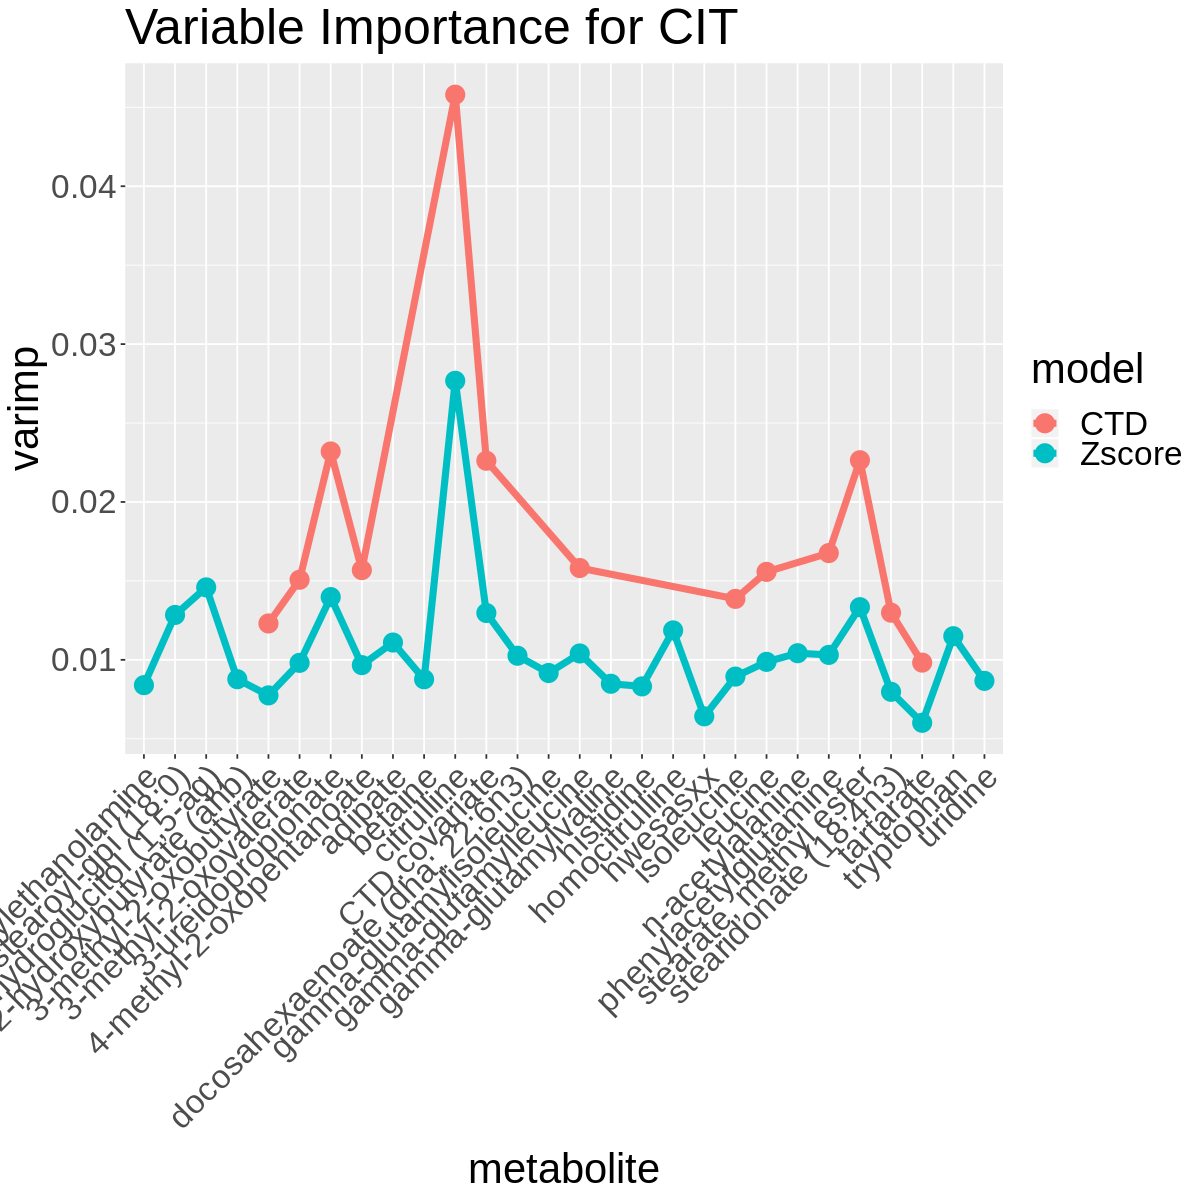

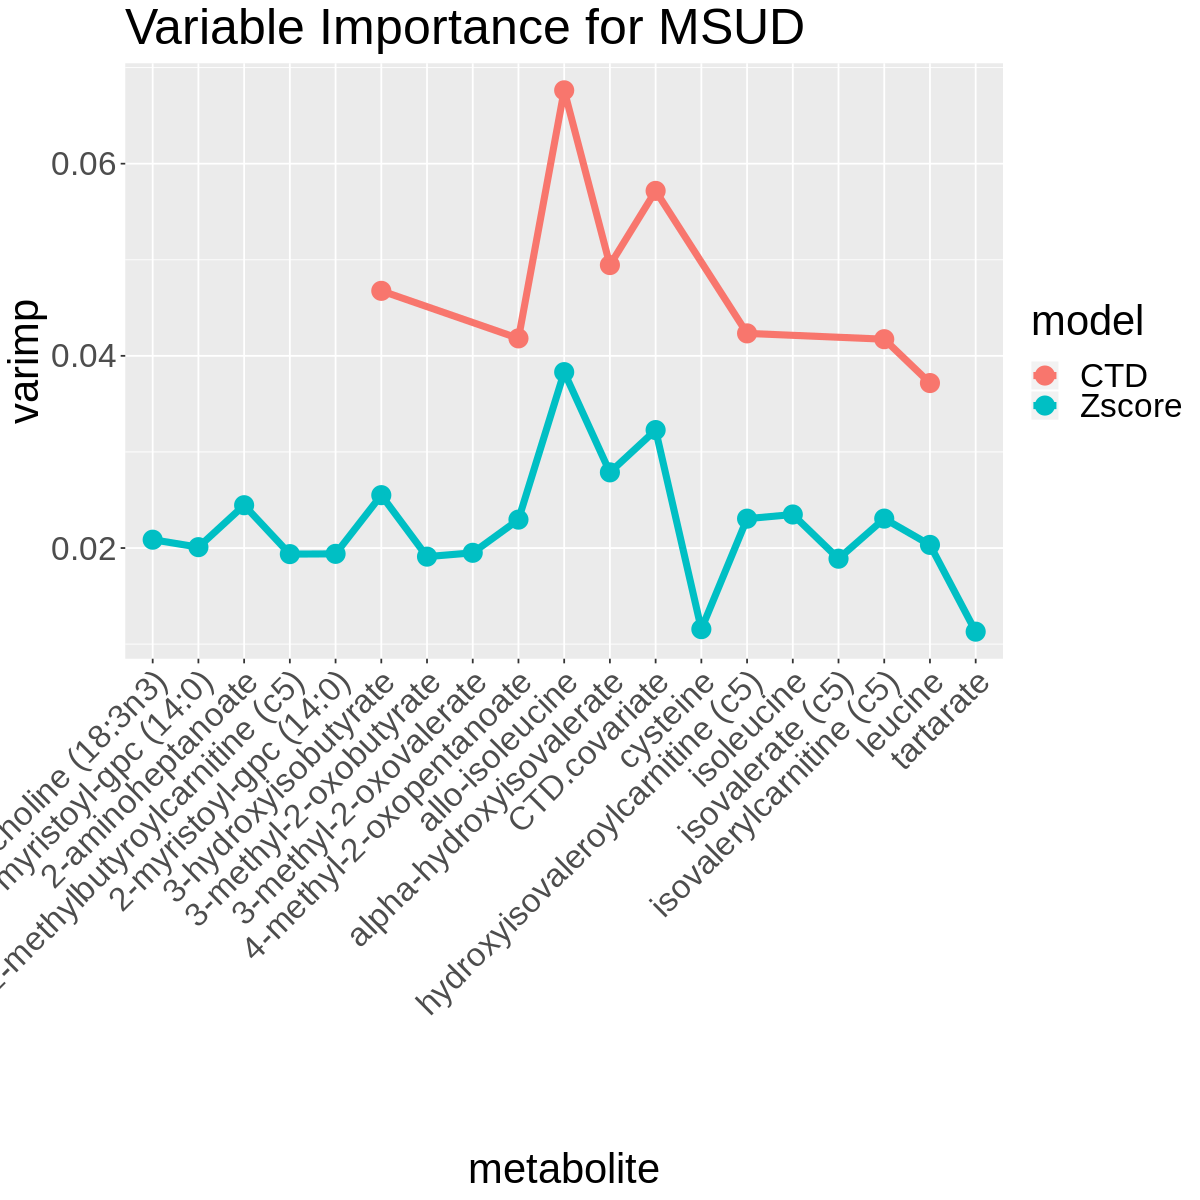

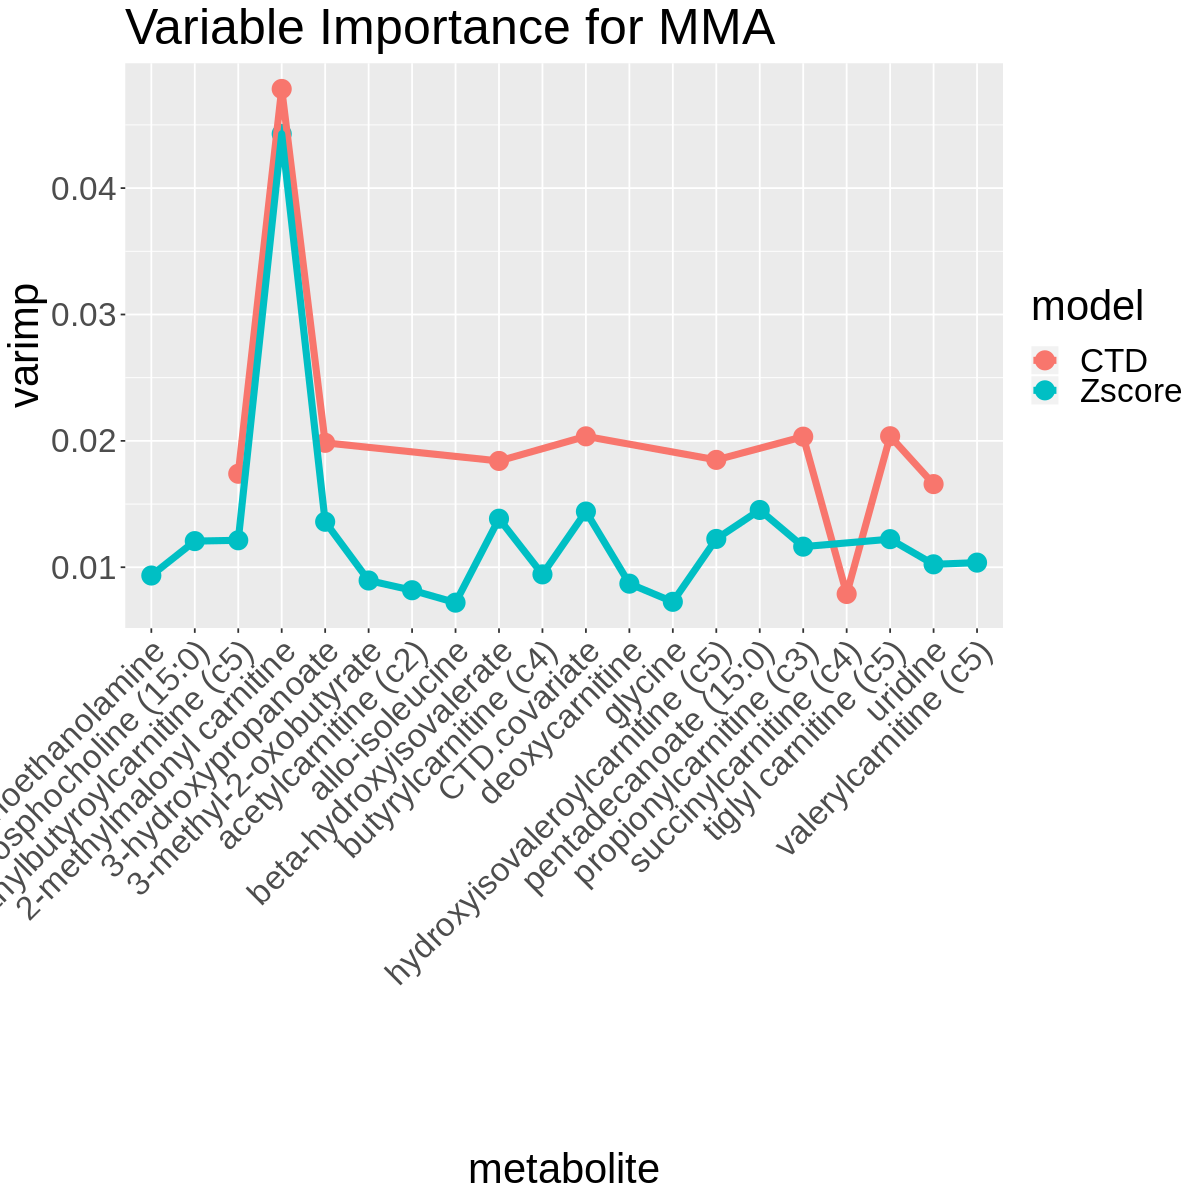

$cit

$msud

$mma

$pa

$pku


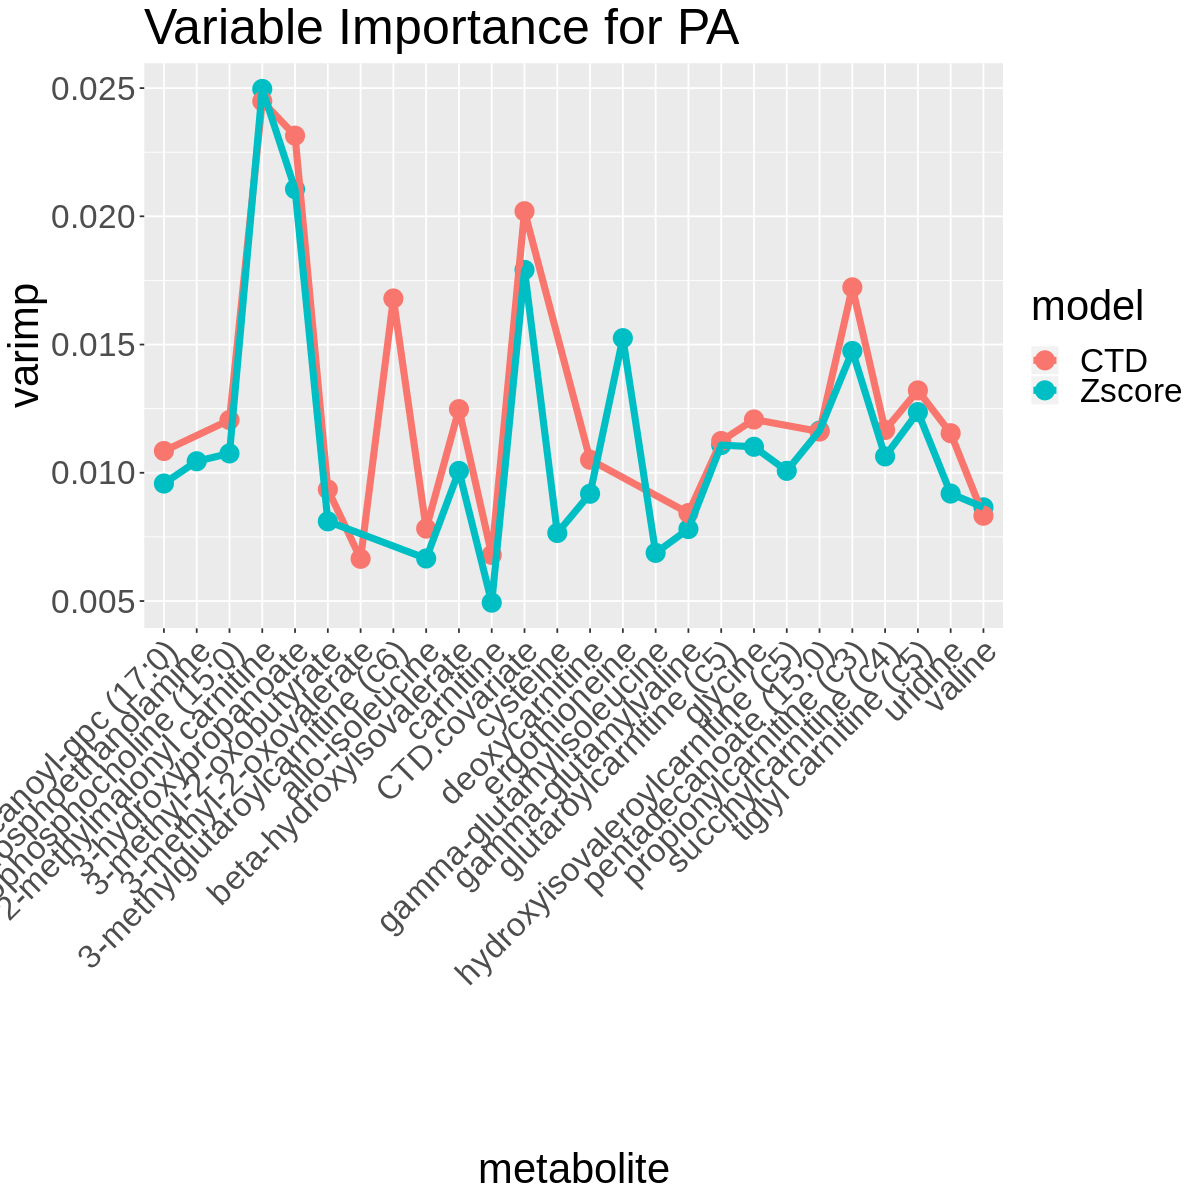

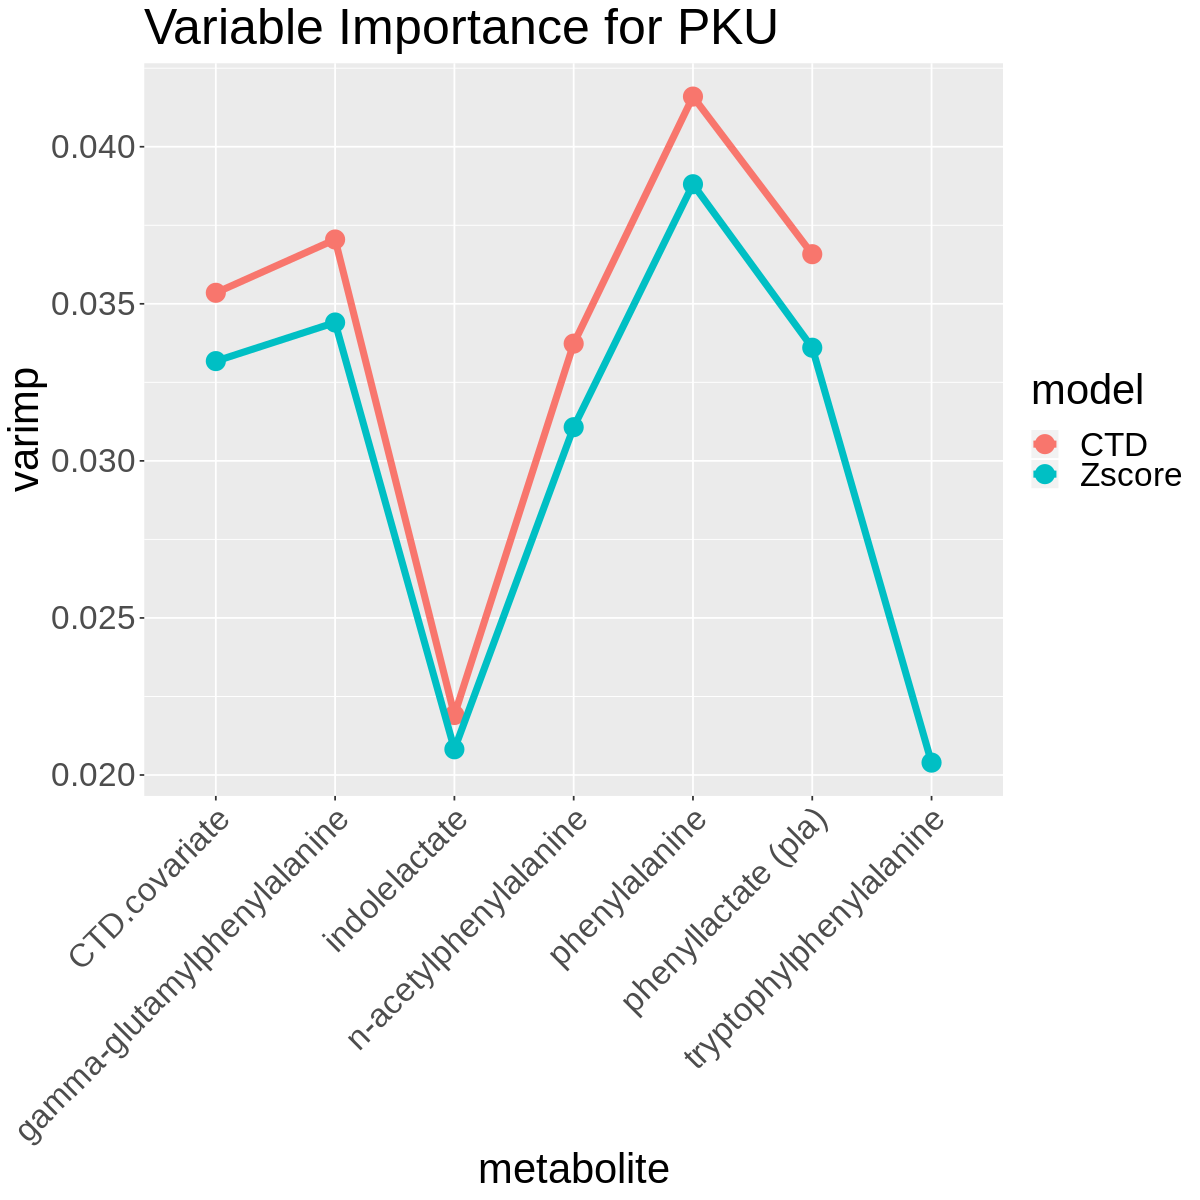

In [0]:
rm(list=setdiff(ls(),c("data_mx.og","cohorts","fsmethods","dff_model","df_varImp2")))
p=list()
for (model in c("cit", "msud", "mma", "pa", "pku")){
  p[[model]]=ggplot(df_varImp2[[model]], aes(x=metabolite, y=varimp, group=model, colour=model)) +
    geom_point(size=5) +
    geom_line(size=2) +
    theme(text = element_text(size=25), axis.text.x = element_text(angle = 45, hjust = 1)) +
    ggtitle(sprintf("Variable Importance for %s", toupper(model)))
}
p

In [0]:
# calculate AUC
pls_auc=list()
pls_auc2=list()
for (model in c("cit", "msud", "mma", "pa", "pku")) {
  print("")
  print(sprintf("For %s model...", toupper(model)))

  # Get diagnostic labels
  load(sprintf("./loocv/loocv_ind_runCTD/best_bits_%s_ind_loocv.RData", model))
  diag = dff$diag
  diag[which(diag != model)] = 0
  diag[which(diag == model)] = 1
  
  # Calculate AUC using pROC, since you cannot calculate directly with TP, TN, FP, FN
  for (fsmethod in fsmethods){
    pls_auc[[fsmethod]]=roc(diag, dff_model[[model]][[fsmethod]], quiet = TRUE)
    print(sprintf("PLS regression by %s selected features + CTD.covariate AUC = %.3f", fsmethod, pls_auc[[fsmethod]]$auc))
    pls_auc2[[fsmethod]] = coords(pls_auc[[fsmethod]], "best", ret=c("threshold", "specificity", "accuracy", "precision", "recall"))
  }
  ctd_auc = roc(diag, dff$bits, quiet = TRUE)
  print(sprintf("PLS regression by CTD.covariate only AUC = %.3f", pls_auc[[fsmethod]]$auc))
  ctd_auc2 = coords(ctd_auc, "best", ret=c("threshold", "specificity", "accuracy", "precision", "recall"))
  print(pls_auc2)
  print(ctd_auc2)
}

[1] ""
[1] "For CIT model..."
[1] "PLS regression by Zscore selected features + CTD.covariate AUC = 1.000"
[1] "PLS regression by CTD selected features + CTD.covariate AUC = 1.000"
[1] "PLS regression by CTD.covariate only AUC = 1.000"
$Zscore
          threshold specificity accuracy precision recall
threshold 0.4990292           1        1         1      1

$CTD
          threshold specificity accuracy precision recall
threshold 0.5134073           1        1         1      1

          threshold specificity  accuracy precision recall
threshold  16.46748     0.94375 0.9467456       0.5      1
[1] ""
[1] "For MSUD model..."
[1] "PLS regression by Zscore selected features + CTD.covariate AUC = 1.000"
[1] "PLS regression by CTD selected features + CTD.covariate AUC = 1.000"
[1] "PLS regression by CTD.covariate only AUC = 1.000"
$Zscore
          threshold specificity accuracy precision recall
threshold 0.3638952           1        1         1      1

$CTD
          threshold specificity 